In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from lmfit import Model
from scipy import interpolate
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import glob

In [3]:
from __future__ import unicode_literals
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
rcParams['legend.fontsize'] = 16
rcParams['legend.borderaxespad'] = 1
rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

C:\Users\Heather\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [4]:
xinc = 2e-12
xoffset = 7.533e-8 

In [5]:
ymult = 3.125e-7
yoffset = -0.2427527 #this doesn't make sense to me - would put z = 30 ohms

In [6]:
v_max = 1.0

In [7]:
split = np.load('/Users/Heather/Documents/RF_flexi_launch/tdr_04_02/tdr_04_02/colddip5.npy')

In [8]:
t_sec = np.arange(len(split))*xinc + xoffset

In [9]:
div_max = np.max(split)

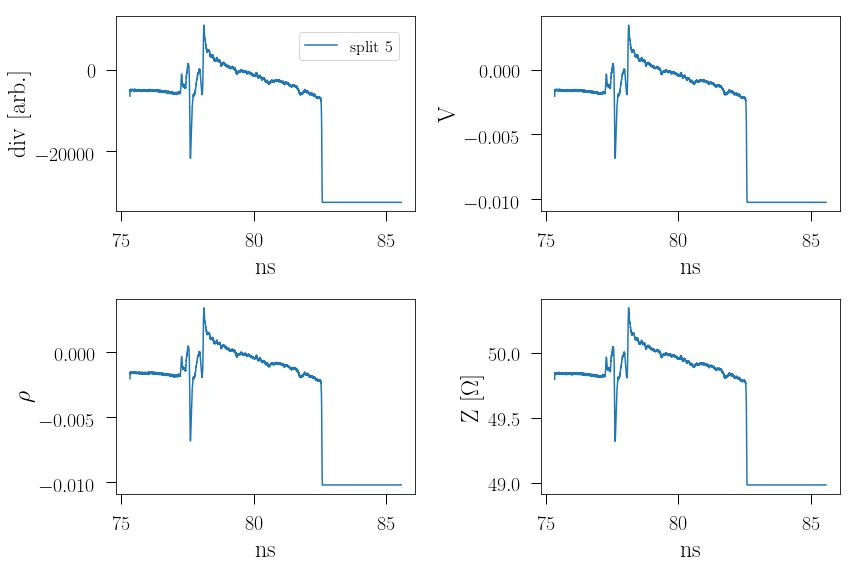

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (12,8))

axs[0, 0].plot(t_sec*1e9, split, label = '$\mathrm{split\ 5}$')
axs[0, 0].set_xlabel('$\mathrm{ns}$')
axs[0, 0].set_ylabel('$\mathrm{div\ [arb.]}$')
axs[0, 0].legend()

y_volts = split*ymult 
axs[0, 1].plot(t_sec*1e9, y_volts)
axs[0, 1].set_xlabel('$\mathrm{ns}$')
axs[0, 1].set_ylabel('$\mathrm{V}$')

rho = y_volts/v_max #including yoffset doesn't make sense
axs[1, 0].plot(t_sec*1e9, rho)
axs[1, 0].set_xlabel('$\mathrm{ns}$')
axs[1, 0].set_ylabel('$\mathrm{\\rho}$')

z_ohms = 50*((1+rho)/(1-rho))
axs[1, 1].plot(t_sec*1e9, z_ohms)
axs[1, 1].set_xlabel('$\mathrm{ns}$')
axs[1, 1].set_ylabel('$\mathrm{Z\ [\\Omega]}$')
fig.tight_layout()

In [11]:
files = np.array(glob.glob('/Users/Heather/Documents/RF_flexi_launch/tdr_04_02/tdr_04_02/*cold*.npy'))

In [12]:
calibrated = np.array([0,1,0,0,1])

In [13]:
splits = [0,1,2,4,5]

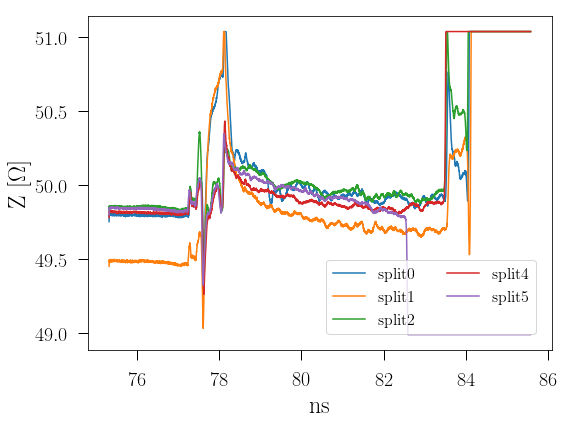

In [14]:
#without the given DC offset 

figure(figsize = (8,6))
k = 0

for f in files:
    split = np.load(f)
    t_sec = np.arange(len(split))*xinc + xoffset
    y_volts = split*ymult 
    rho = y_volts/v_max
    z_ohms = 50*((1+rho)/(1-rho))
    plot(t_sec*1e9, z_ohms , label = '$\mathrm{split %0.0f}$' %splits[k])
    k = k+1 
    
xlabel('$\mathrm{ns}$')
ylabel('$\mathrm{Z\ [\\Omega]}$')

legend(loc=4, ncol=2)
tight_layout()

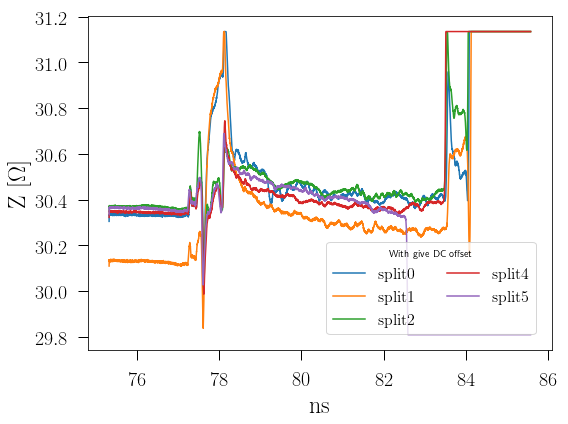

In [16]:
#with the given dc offset 

figure(figsize = (8,6))
k = 0

for f in files:
    split = np.load(f)
    t_sec = np.arange(len(split))*xinc + xoffset
    y_volts = split*ymult + yoffset
    rho = y_volts/v_max
    z_ohms = 50*((1+rho)/(1-rho))
    plot(t_sec*1e9, z_ohms , label = '$\mathrm{split %0.0f}$' %splits[k])
    k = k+1 
    
xlabel('$\mathrm{ns}$')
ylabel('$\mathrm{Z\ [\\Omega]}$')

legend(loc=4, ncol=2, title = '$\mathrm{With\ given\ DC\ offset')
tight_layout()